In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Upload data

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving cleaned_data_logistic_regression.csv to cleaned_data_logistic_regression.csv


In [ ]:
data = pd.read_csv('cleaned_data_logistic_regression.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0000,177.9000,33.6,0.627,50,1
1,1,85.0,66.0,29.0000,41.5995,26.6,0.351,31,0
2,8,183.0,64.0,12.9995,528.0000,23.3,0.672,32,1
3,1,89.0,66.0,23.0000,94.0000,28.1,0.167,21,0
4,0,137.0,40.0,35.0000,168.0000,43.1,2.288,33,1


Basic Operations

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.616535,72.044260,28.861932,164.817888,32.326348,0.471876,33.240885,0.348958
std,3.369578,30.722312,13.142954,12.748930,146.019818,6.966415,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,20.000000,64.000000,27.375000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.400000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,35.000000,177.900000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [ ]:
data.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
data.duplicated().sum()

0

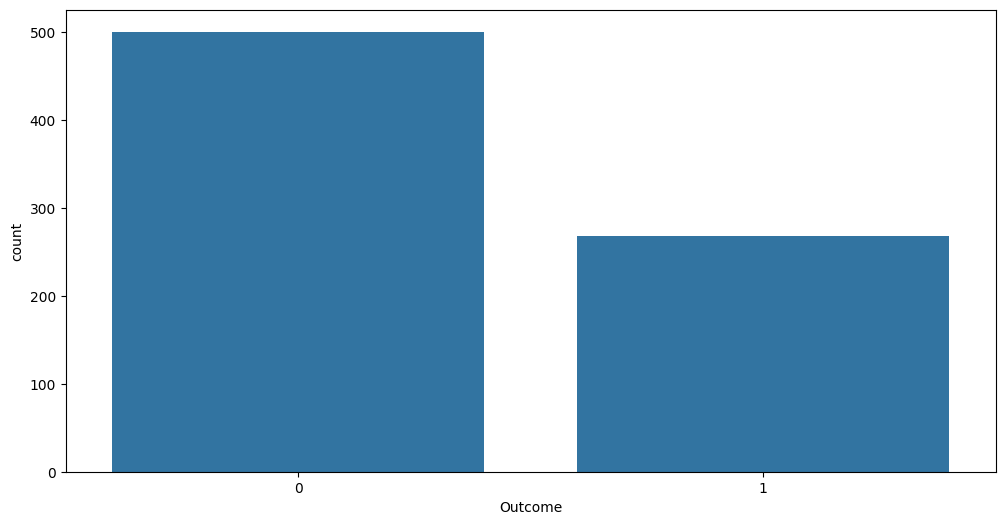

In [ ]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'Outcome',data = data)
plt.show()

Outliers

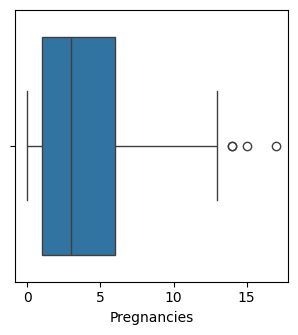

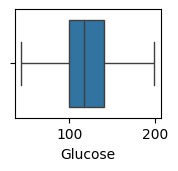

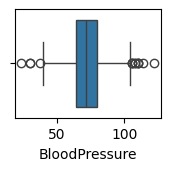

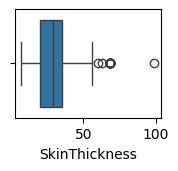

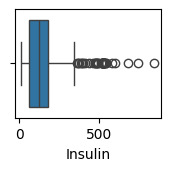

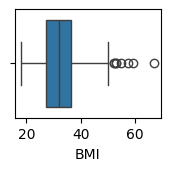

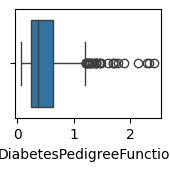

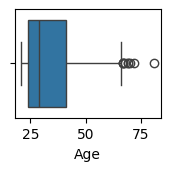

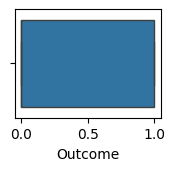

In [ ]:
plt.figure(figsize = (12,12))
for i,col in enumerate(['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']):
  plt.subplot(3,3,i+1)
  sns.boxplot(x = col,data = data)
  plt.show()

Correlation Analysis Heatmap

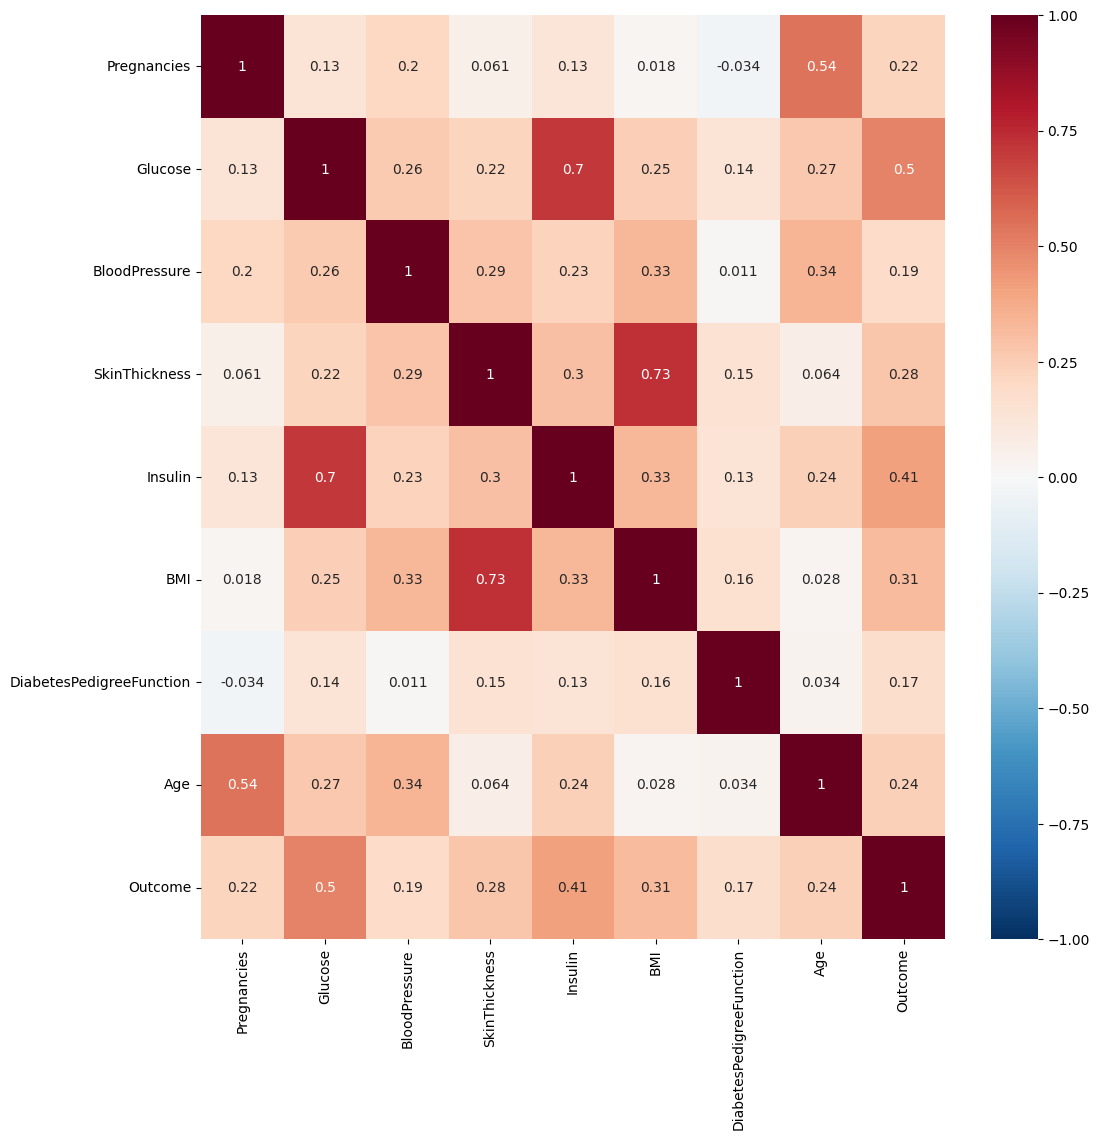

In [ ]:
plt.figure(figsize = (12,12))
sns.heatmap(data.corr(), vmin = -1.0, center = 0, cmap = 'RdBu_r', annot = True)
plt.show()

**Standard Scaling and Label Encoding**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x = pd.DataFrame(sc_x.fit_transform(data.drop(['Outcome'],axis = 1),),
    columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])

In [ ]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.859332,-0.003370,0.481771,0.089650,0.182947,0.468492,1.425995
1,-0.844885,-1.192631,-0.460186,0.010837,-0.844397,-0.822529,-0.365061,-0.190672
2,1.233880,1.999311,-0.612458,-1.245028,2.488832,-1.296539,0.604397,-0.105584
3,-0.844885,-1.062348,-0.460186,-0.460098,-0.485304,-0.607070,-0.920763,-1.041549
4,-1.141852,0.501052,-2.439721,0.481771,0.021807,1.547521,5.484909,-0.020496


In [ ]:
y = data['Outcome']

Test Train Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Lists to hold scores and parameter combinations
train_scores = []
test_scores = []
params_list = []  # To store parameter combinations

# Hyperparameters
distance_metrics = ['euclidean', 'manhattan']
weights_options = ['uniform', 'distance']

Find value of K + Hyperparameters

In [ ]:
 #Loop through different values of k
for k in range(1, 50):
    for metric in distance_metrics:
        for weight in weights_options:
            knn = KNeighborsClassifier(n_neighbors=k, metric=metric, weights=weight)
            knn.fit(x_train, y_train)

            # Calculate scores
            train_score = knn.score(x_train, y_train)
            test_score = knn.score(x_test, y_test)

            # Append scores and parameters
            train_scores.append(train_score)
            test_scores.append(test_score)
            params_list.append((k, metric, weight, train_score, test_score))  # Store train and test scores

# Find the maximum testing score and corresponding parameters
max_test_score = max(test_scores)
test_index = test_scores.index(max_test_score)
best_test_params = params_list[test_index]


Result

In [ ]:
 #Output results
print('Max Test score: {:.2f}% at k = {}, metric = {}, weights = {}'.format(
    max_test_score * 100,
    best_test_params[0],
    best_test_params[1],
    best_test_params[2]
))
print('Training score for the best model: {:.2f}%'.format(best_test_params[3] * 100))  # Retrieve training score
print('Testing score for the best model: {:.2f}%'.format(best_test_params[4] * 100))  # Retrieve testing score

# Fit the model with the best parameters
best_knn = KNeighborsClassifier(n_neighbors=best_test_params[0],
                                metric=best_test_params[1],
                                weights=best_test_params[2])
best_knn.fit(x_train, y_train)

# Make predictions
y_pred = best_knn.predict(x_test)

# Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Output confusion matrix and classification report
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Max Test score: 80.09% at k = 30, metric = manhattan, weights = uniform
Training score for the best model: 77.84%
Testing score for the best model: 80.09%

Confusion Matrix:
 [[147  10]
 [ 36  38]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.94      0.86       157
           1       0.79      0.51      0.62        74

    accuracy                           0.80       231
   macro avg       0.80      0.72      0.74       231
weighted avg       0.80      0.80      0.79       231

